In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from astropy.wcs import WCS
import os
import scipy.stats as stats
import json
import pandas as pd
from fitsutil import *
from bc_imaging_analysis import imaging_analysis
from xraysky.scripts import events_imaging
from bcpsf import *


This one is for windows

In [ ]:
eventPath = Path(
    r"Z:/Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233_HORI_0_0\Analysis\imaging_analysis_20241213\combined_events_th1_200.fits.gz"
)
d = fits.open(eventPath)

In [2]:
eventPath = Path(
    r"/mnt/z/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/y2024-12-12/BC057_Ti_FF_233_HORI_0_0/Analysis/imaging_analysis_20241213/combined_events_th1_200.fits.gz"
)
d = fits.open(eventPath)
cols = d[1].columns
(d[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   60 / length of dimension 1                          
NAXIS2  =                43141 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
TTYPE1  = 'EVT_ID  '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'DET_SN  '                                                            
TFORM2  = 'I       '                                                            
TTYPE3  = 'FRAME_ID'        

In [ ]:
print(type(d))
evntlist_in_browser(eventPath)

In [3]:
#signal, trash = splitEventList(d,3020,"sum")
signal, noiseShelf = splitEventList(d,550,"sum")
noiseShelf.columns = cols
noiseShelf.header = d[1].header
noiseShelf.writeto("/home/laurel/astro/testing/noiseshelf.fits.gz",overwrite=True)
signal.columns = cols
signal.header = d[1].header
signal.writeto("/home/laurel/astro/testing/signal.fits.gz",overwrite=True)

In [ ]:
noise = Spectrum("/home/laurel/astro/testing/noiseshelf.fits.gz",th1 = 200, th2=60)
noise.plotSpectrum(binsize=10)
sig = Spectrum("/home/laurel/astro/testing/signal.fits.gz",th1 = 200, th2=60)
sig.plotSpectrum(binsize=10)

In [4]:
a,b = halfEventList(signal)

In [ ]:
random_a = random_sample_events_list(a,1500)
random_b = random_sample_events_list(b,1000)

In [ ]:
noise = np.array(noiseShelf.data)


In [ ]:
random_a.data = np.append(random_a.data,noiseShelf.data)
print(len(random_a.data))

In [ ]:
SampleHDU = fits.BinTableHDU.from_columns(cols)
random_a.columns = cols
random_a.header = d[1].header
random_a.writeto("/home/laurel/astro/testing/test.fits.gz",overwrite=True)


In [ ]:
test = fits.open("/home/laurel/astro/testing/test.fits.gz")
test[1].header

In [ ]:
test = Spectrum("/home/laurel/astro/testing/test.fits.gz",th1 = 200, th2=60)
test.plotSpectrum(binsize=10)
#out = test.filterEvents(sumrange=[0,550])
#out.plotSpectrum(binsize=10)


Found 2 peak(s)


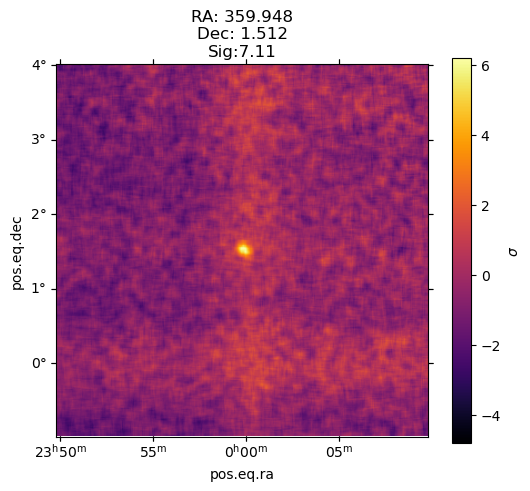

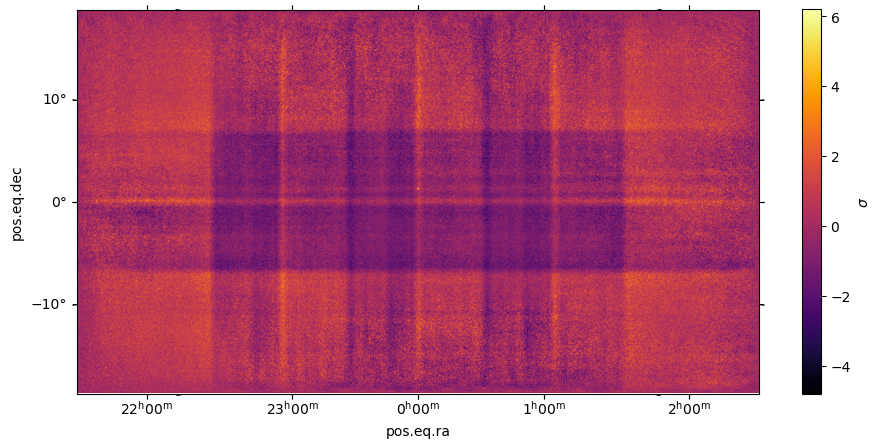

In [5]:
imager= events_imaging.BC_Imaging()
imageOut = imager.evtlist2image(
    "/home/laurel/astro/testing/test.fits.gz","/home/laurel/astro/testing/test_reconstruct.fits.gz"
)
imager.plotSource(imageOut)
peaks = imager.imager.findpeaks(imageOut.data.T) # Index 5 has the significance

In [6]:
d = fits.open("/home/laurel/astro/testing/test_reconstruct.fits.gz")
data = d[0].header
out = a.header

In [15]:
peaks.size
p = peaks[0]
p[5]

np.float64(7.111876835016931)

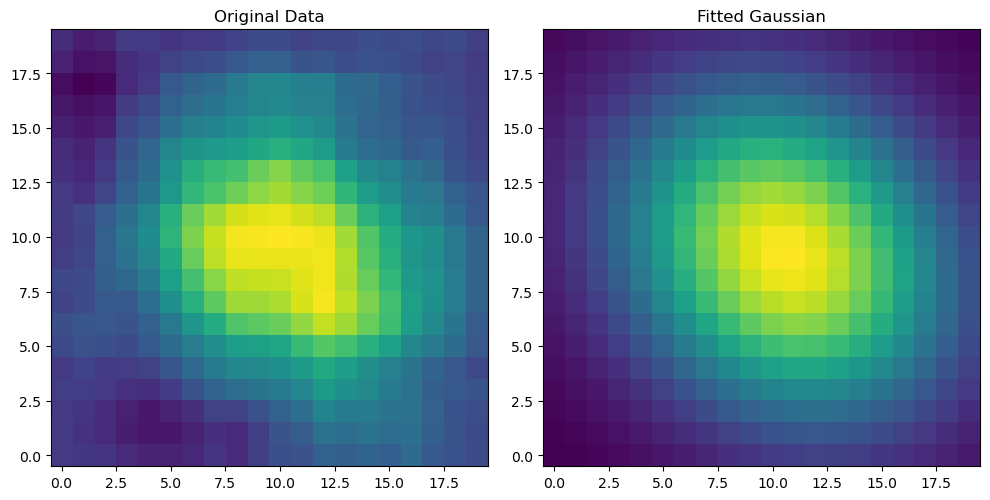

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [7]:
test = analyze_localization(d,plot=True)